In [2]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray
import xarray as xr
from netCDF4 import Dataset
from shapely.geometry import mapping

# Historical Heatwaves Incidence

In this notebook, we will explore heatwaves incidence, based on [pre-calculated data](ttps://worldbankgroup.sharepoint.com.mcas.ms/teams/DevelopmentDataPartnershipCommunity-WBGroup/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=Yvwh8r&cid=fccdf23e%2D94d5%2D48bf%2Db75d%2D0af291138bde&FolderCTID=0x012000CFAB9FF0F938A64EBB297E7E16BDFCFD&id=%2Fteams%2FDevelopmentDataPartnershipCommunity%2DWBGroup%2FShared%20Documents%2FProjects%2FHeatwaves%20Data%20Collaborative%2FData%2Fremotesensing%2Fhwdi%5F5degC&viewid=80cdadb3%2D8bb3%2D47ae%2D8b18%2Dc1dd89c373c5) obtained from NASA's [GLDAS](https://ldas.gsfc.nasa.gov/gldas)


## Definitions of heatwaves for which data is available
A heatwave is typically defined as the defined number of consecutive days (x) where the temperature is greater than the mean/max/defined percentile (y) of the baseline temperataure in that area. 

The file name in the [folder](https://worldbankgroup.sharepoint.com.mcas.ms/teams/DevelopmentDataPartnershipCommunity-WBGroup/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=Yvwh8r&cid=fccdf23e%2D94d5%2D48bf%2Db75d%2D0af291138bde&FolderCTID=0x012000CFAB9FF0F938A64EBB297E7E16BDFCFD&id=%2Fteams%2FDevelopmentDataPartnershipCommunity%2DWBGroup%2FShared%20Documents%2FProjects%2FHeatwaves%20Data%20Collaborative%2FData%2Fremotesensing%2Fhwdi%5F5degC&viewid=80cdadb3%2D8bb3%2D47ae%2D8b18%2Dc1dd89c373c5)
suggest the definition used. 

hwdi_ydrunmean2: Is the Heat Wave Duration Index where the temperature for 2 consecutive days is 5 degrees more than the mean of the baseline
hwdi_ydrunpctl290: Is the Heat Wave Duration Index where the temperature for 2 consecutive days is 5 degrees more than the 90th percentile of the baseline

The bseline for all of the data is 1986 to 2005


## Getting multiple datasets that calculate heatwaves based on different definitions

In [3]:
# parallel ensures that it being parallel processing
#ds_mean3 = xr.open_mfdataset("../../data/gldas/ymean3/wld_cli_*.nc4", parallel=True)
# ds_percentile390 = xr.open_mfdataset("../../data/gldas/ypercentile90/wld_cli_*.nc4", parallel = True)
# ds_mean4= xr.open_mfdataset("../../data/gldas/ymean4/wld_cli_*.nc4", parallel = True)
# ds_percentile490= xr.open_mfdataset("../../data/gldas/ypercentile490/wld_cli_*.nc4", parallel = True)
ds_mean2=xr.open_mfdataset("../../data/gldas/ymean2/wld_cli_*.nc4", parallel = True)
# ds_percentile290=xr.open_mfdataset("../../data/gldas/ypercentile290/wld_cli_*.nc4", parallel = True)

In [6]:
#ds_mean2['heat_wave_duration_index_wrt_mean_of_reference_period'].values

In [7]:
ds_1948 = xr.open_mfdataset('../../data/gldas/ymean2/wld_cli_gldas20_tasmax_ydrunmean2_hwdi_1948.nc4')
ds_2021 = xr.open_mfdataset('../../data/gldas/ymean2/wld_cli_gldas21_tasmax_ydrunmean2_hwdi_2021.nc4')

## Change in number of heatwaves from 1948 to 2021

Text(0, 0.5, '# of heatwaves')

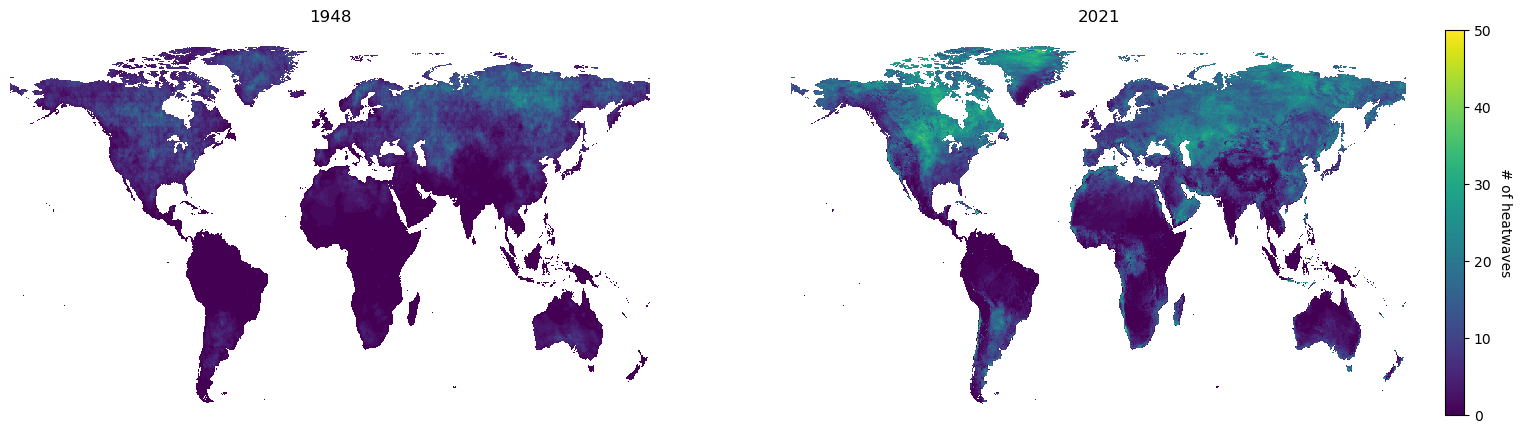

In [67]:
fig, ax = plt.subplots(
    1,
    2,
    sharex=True,
    sharey=True,
    figsize=(20, 5),
    gridspec_kw={"width_ratios": [1, 1.2]},
)

im = ds_1948["heat_waves_per_time_period"].plot(ax=ax[0], vmin=0, vmax=50)
im2 = ds_2021["heat_waves_per_time_period"].plot(ax=ax[1], vmin=0, vmax=50)
# cbar_ax = fig.add_axes([0, 10, 20, 40])
# fig.colorbar(im, cax=cbar_ax)
# ax.axis('off')

ax[0].set_title("1948")
ax[1].set_title("2021")

# ax[0].get_legend().remove()

for i in [0, 1]:
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].axis("off")

handles, labels = ax[1].get_legend_handles_labels()
# print(labels)

cb = im.colorbar
cb.remove()

cb = im2.colorbar
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel("# of heatwaves", rotation=270)

Exploring the data, 

In [ ]:
# time_bnds = [(np.datetime64("1948-01-01"), np.datetime64("2022-04-30"))]
# time_var = ds_tasmax.variables["time"]
# start_date = np.datetime64("2022-02-01")
# end_date = np.datetime64("2022-04-30")

# start_index = np.where(time_var[:] == start_date)[0]
# end_index = np.where(time_var[:] == end_date)[0]

### Boundaries of the region of interest

In this part, we get the shapefiles of the country we're interested in looking at

In [10]:
INDIA = geopandas.read_file("../../data/shapefiles/india_district/sh819zz8121.shp").to_crs("EPSG:4326")
CHENNAI = INDIA[INDIA["laa"] == "CHENNAI"]
DELHI = INDIA[INDIA['laa']=='DELHI']
HYDERABAD = INDIA[INDIA['laa']=='HYDERABAD']
MUMBAI = INDIA[INDIA['laa'].str.contains('MUMBAI')]

Taking a quick visual inspection,

In [4]:
CHENNAI

f_code  coc        nam      laa       pop  ypc adm_code salb  soc  \
1028  FA001  IND  TAMILNADU  CHENNAI -99999999    0      UNK  UNK  IND   

                                               geometry  
1028  POLYGON Z ((80.18835 13.02658 0.00000, 80.1865...

<Axes: >

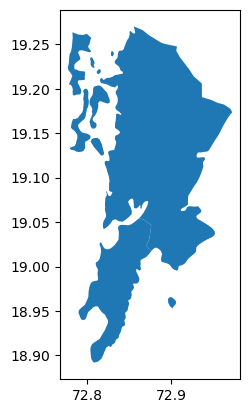

In [20]:
MUMBAI.plot()

## Clipping

In this step, our intention is to clip the heatwaves incident data using boundaries.

Convert a Z polygon into a two dimensional polygon. If the shapefile does not require it, this step can be avoided

In [46]:
import shapely
CHENNAI['geometry'] = CHENNAI['geometry'].apply(lambda x: shapely.wkb.loads(
        shapely.wkb.dumps(x, output_dimension=2)))

c:\Users\sahit\anaconda3\envs\heatwaves\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [12]:
def clip_area(ds, area):

    ds.rio.write_crs("EPSG:4326", inplace=True)
    clipped_area = ds.rio.clip(area.geometry.values,all_touched=True, drop=True)

    return clipped_area


In [13]:
clipped_hyd = clip_area(ds_mean2, HYDERABAD)
clipped_chennai = clip_area(ds_mean2, CHENNAI)
clipped_delhi = clip_area(ds_mean2, DELHI)
clipped_mumbai = clip_area(ds_mean2, MUMBAI)

Now, converting to a dataframe and `geopandas.GeoDataFrame`

In [41]:
ds_mean2

<xarray.Dataset>
Dimensions:                                                (time: 75,
                                                            lon: 1440, lat: 600)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * lon                                                    (lon) float32 -179...
  * lat                                                    (lat) float32 -59....
    spatial_ref                                            int32 0
Data variables:
    heat_wave_duration_index_wrt_mean_of_reference_period  (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    heat_waves_per_time_period                             (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Thu Dec 08 04:41:45 2022: cdo -z zip_5 eca_hwdi,2,5 wld_cli...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [15]:
def convert_to_gdf(clipped_area):
    clipped_area = clipped_area.to_dataframe().reset_index()

    clipped_area = geopandas.GeoDataFrame(
        clipped_area.reset_index(), geometry=geopandas.points_from_xy(clipped_area["lon"],clipped_area["lat"])
    )

    return clipped_area

In [17]:
clipped_india = convert_to_gdf(clip_area(ds_mean2, INDIA))

In [27]:
CALIFORNIA = geopandas.read_file('../../data/shapefiles/usa/ca-state-boundary/CA_State_TIGER2016.shp')

In [34]:
CALIFORNIA = CALIFORNIA.to_crs("EPSG:4326")

In [35]:
clipped_cali = clip_area(ds_mean2, CALIFORNIA)

In [39]:
clipped_cali = clipped_cali.to_dataframe().reset_index()

In [40]:
clipped_cali[clipped_cali['heat_wave_duration_index_wrt_mean_of_reference_period']>365]

time      lon     lat  spatial_ref  \
109855 2015-12-31 13:30:00 -123.875  40.375            0   
109892 2015-12-31 13:30:00 -123.625  39.875            0   
109893 2015-12-31 13:30:00 -123.625  40.125            0   
109894 2015-12-31 13:30:00 -123.625  40.375            0   
109895 2015-12-31 13:30:00 -123.625  40.625            0   
...                    ...      ...     ...          ...   
120670 2021-12-31 13:30:00 -117.375  33.625            0   
120750 2021-12-31 13:30:00 -116.875  34.125            0   
120786 2021-12-31 13:30:00 -116.625  33.375            0   
120823 2021-12-31 13:30:00 -116.375  32.875            0   
120861 2021-12-31 13:30:00 -116.125  32.625            0   

        heat_wave_duration_index_wrt_mean_of_reference_period  \
109855                                              471.0       
109892                                              480.0       
109893                                              623.0       
109894                                              878.0       
109895                                              689.0       
...                                                   ...       
120670                                              565.0       
120750                                              621.0       
120786                                              372.0       
120823                                              472.0       
120861                                              432.0       

        heat_waves_per_time_period  
109855                        24.0  
109892                        31.0  
109893                        27.0  
109894                        27.0  
109895                        27.0  
...                            ...  
120670                        28.0  
120750                        28.0  
120786                        20.0  
120823                        25.0  
120861                        21.0  

[1004 rows x 6 columns]

In [25]:
clipped_india[clipped_india['heat_wave_duration_index_wrt_mean_of_reference_period']>365]

index                time     lon     lat  spatial_ref  \
965809    965809 2015-12-31 13:30:00  70.625  21.125            0   
965930    965930 2015-12-31 13:30:00  70.875  20.875            0   
965931    965931 2015-12-31 13:30:00  70.875  21.125            0   
965932    965932 2015-12-31 13:30:00  70.875  21.375            0   
966053    966053 2015-12-31 13:30:00  71.125  21.125            0   
...          ...                 ...     ...     ...          ...   
1078183  1078183 2022-04-30 13:30:00  94.375  24.125            0   
1078184  1078184 2022-04-30 13:30:00  94.375  24.375            0   
1078185  1078185 2022-04-30 13:30:00  94.375  24.625            0   
1078307  1078307 2022-04-30 13:30:00  94.625  24.625            0   
1078557  1078557 2022-04-30 13:30:00  95.125  26.125            0   

         heat_wave_duration_index_wrt_mean_of_reference_period  \
965809                                               573.0       
965930                                               385.0       
965931                                               909.0       
965932                                               468.0       
966053                                               810.0       
...                                                    ...       
1078183                                              430.0       
1078184                                              497.0       
1078185                                              371.0       
1078307                                              467.0       
1078557                                              486.0       

         heat_waves_per_time_period                   geometry  
965809                         13.0  POINT (70.62500 21.12500)  
965930                         14.0  POINT (70.87500 20.87500)  
965931                         13.0  POINT (70.87500 21.12500)  
965932                          8.0  POINT (70.87500 21.37500)  
966053                         10.0  POINT (71.12500 21.12500)  
...                             ...                        ...  
1078183                         5.0  POINT (94.37500 24.12500)  
1078184                         4.0  POINT (94.37500 24.37500)  
1078185                         5.0  POINT (94.37500 24.62500)  
1078307                         4.0  POINT (94.62500 24.62500)  
1078557                         9.0  POINT (95.12500 26.12500)  

[1038 rows x 8 columns]

In [16]:
clipped_hyd = convert_to_gdf(clipped_hyd)
clipped_chennai = convert_to_gdf(clipped_chennai)
clipped_delhi = convert_to_gdf(clipped_delhi)
clipped_mumbai = convert_to_gdf(clipped_mumbai)

<Axes: xlabel='time'>

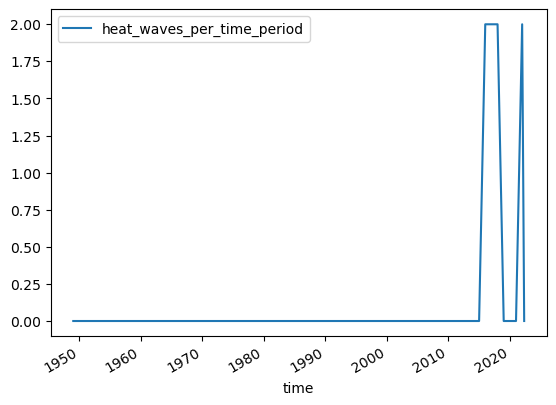

In [31]:
clipped_chennai.groupby(['time']).sum().reset_index().plot(x='time',y='heat_waves_per_time_period')

Write to file so it can be plotted on foursquare

In [63]:
clipped_india.to_file('../../data/gldas/india_mean2.geojson', driver='GeoJSON')

In [33]:
clipped_india = clip_area(ds_mean2, INDIA)
clipped_india = convert_to_gdf(clipped_india)

<Axes: xlabel='time'>

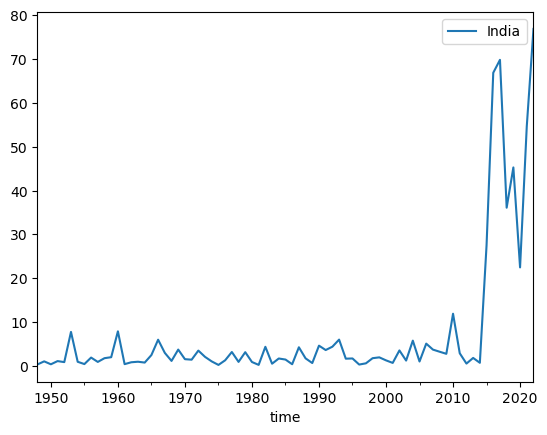

In [56]:
clipped_india.groupby([pd.Grouper(key='time', freq='Y')]).mean().reset_index().plot(x='time', y='heat_wave_duration_index_wrt_mean_of_reference_period',label = 'India', color = '#1F77B4')

<Axes: xlabel='time'>

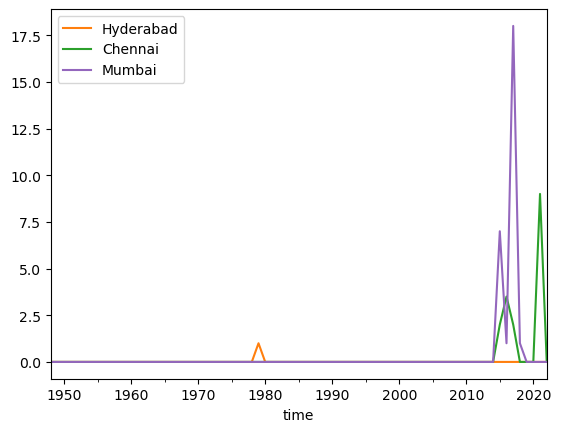

In [64]:
fig, ax = plt.subplots()
#clipped_india.groupby([pd.Grouper(key='time', freq='Y')]).mean().reset_index().plot(x='time', y='heat_waves_per_time_period', ax=ax, label = 'India', color = '#1F77B4')
clipped_hyd.groupby([pd.Grouper(key='time', freq='Y')]).mean().reset_index().plot(x='time', y='heat_wave_duration_index_wrt_mean_of_reference_period', ax=ax, label = 'Hyderabad', color = '#FF7F0E')
clipped_chennai.groupby([pd.Grouper(key='time', freq='Y')]).mean().reset_index().plot(x='time', y='heat_wave_duration_index_wrt_mean_of_reference_period', ax=ax, label = 'Chennai', color = '#2CA02C')
#clipped_delhi.groupby([pd.Grouper(key='time', freq='Y')]).mean().reset_index().plot(x='time', y='heat_wave_duration_index_wrt_mean_of_reference_period', ax=ax, label = 'Delhi', color = '#D62728')
clipped_mumbai.groupby([pd.Grouper(key='time', freq='Y')]).mean().reset_index().plot(x='time', y='heat_wave_duration_index_wrt_mean_of_reference_period', ax=ax, label = 'Mumbai', color = '#9467BD')

## 

In [33]:
df_mean3 = ds_mean3.to_dataframe().groupby(["time", "lat", "lon"]).sum()
df1_mean3 = df_mean3.groupby("time").sum()

## Comparing heatwaves using multiple definitions

In [166]:
df_percentile390 = ds_percentile390.to_dataframe().groupby(["time"]).sum()
df_percentile490 = ds_percentile490.to_dataframe().groupby(["time"]).sum()
df_percentile290 = ds_percentile290.to_dataframe().groupby(["time"]).sum()

df_mean2 = ds_mean2.to_dataframe().groupby(["time"]).sum()

In [169]:
df_mean4 = ds_mean4.to_dataframe().groupby(["time"]).sum()

#### Observations


Text(0.5, 1.0, 'Number of heatwaves using different definitions of a heatwave')

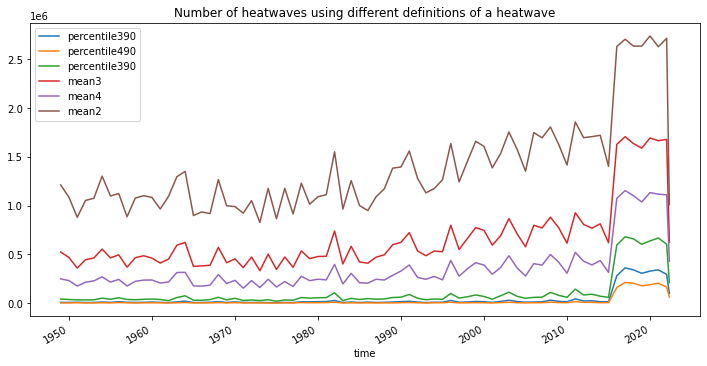

In [177]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12, 6))
df_percentile390[["heat_waves_per_time_period"]].plot(ax=ax, label="percentile390")
df_percentile490[["heat_waves_per_time_period"]].plot(ax=ax)
df_percentile290[["heat_waves_per_time_period"]].plot(ax=ax)

df_mean3[["heat_waves_per_time_period"]].plot(ax=ax)
df_mean4[["heat_waves_per_time_period"]].plot(ax=ax)
df_mean2[["heat_waves_per_time_period"]].plot(ax=ax)

plt.legend(
    ("percentile390", "percentile490", "percentile390", "mean3", "mean4", "mean2"),
    loc="upper left",
)
plt.title("Number of heatwaves using different definitions of a heatwave")